# BCPNN perfect  II - Learning Properties

In [1]:
import pprint
import subprocess
import sys 
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 12)

np.set_printoptions(suppress=True, precision=2)

sns.set(font_scale=3.5)

from network import Protocol, BCPNNModular, NetworkManager, BCPNNPerfect
from plotting_functions import plot_weight_matrix, plot_state_variables_vs_time, plot_winning_pattern
from plotting_functions import plot_network_activity, plot_network_activity_angle
from analysis_functions import calculate_recall_time_quantities, calculate_angle_from_history
from connectivity_functions import artificial_connectivity_matrix

In [2]:
def simple_bcpnn_theo_recall_time(tau_a, g_a, g_w, w_next, w_self):
    
    delta_w = w_self - w_next
    return tau_a * np.log(g_a / (g_a - g_w * delta_w))

## An example
#### General parameters

In [3]:
g_w_ampa = 2.0
g_w = 0.0 
g_a = 10.0
tau_a = 0.250
G = 1.0
sigma = 0.0

In [4]:
# Patterns parameters
hypercolumns = 1
minicolumns = 10
n_patterns = 10

# Manager properties
dt = 0.001
values_to_save = ['o', 's', 'z_pre', 'z_post', 'a', 'i_ampa', 'i_nmda']
    
# Protocol
training_time = 0.100
inter_sequence_interval = 1.0
inter_pulse_interval = 0.0
epochs = 3

# Build the network
nn = BCPNNPerfect(hypercolumns, minicolumns, g_w_ampa=g_w_ampa, g_w=g_w, g_a=g_a, tau_a=tau_a, 
                  sigma=sigma, G=G,
                z_transfer=False, diagonal_zero=False, strict_maximum=True, perfect=True)

# Build the manager
manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

# Build the protocol for training
protocol = Protocol()
patterns_indexes = [i for i in range(n_patterns)]
protocol.simple_protocol(patterns_indexes, training_time=training_time, inter_pulse_interval=inter_pulse_interval,
                         inter_sequence_interval=inter_sequence_interval, epochs=epochs)

# Train
epoch_history = manager.run_network_protocol(protocol=protocol, verbose=True)

epochs 0
epochs 1
epochs 2


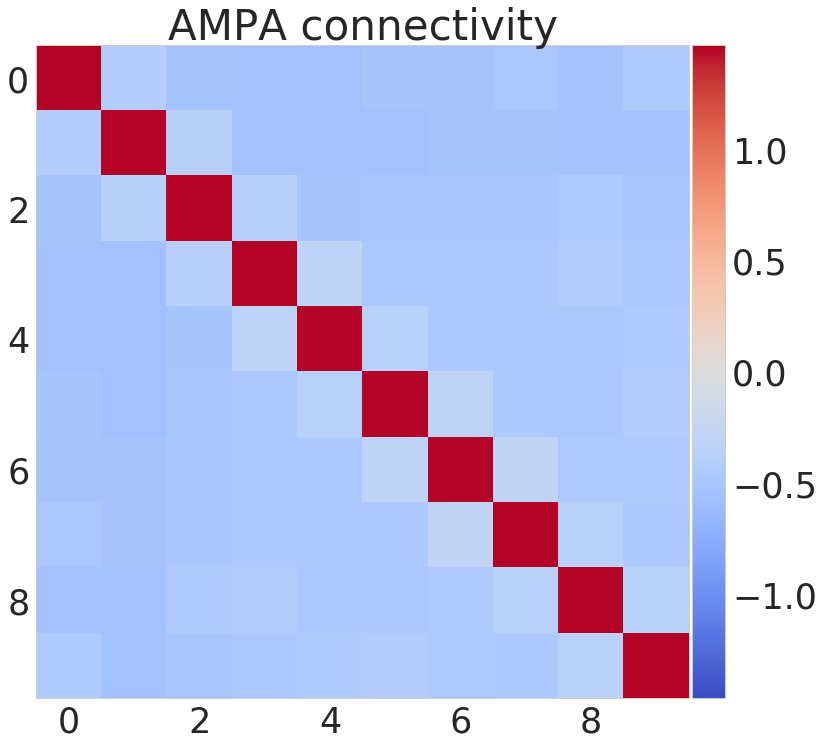

In [5]:
plot_weight_matrix(manager.nn, ampa=True)

success 100.0


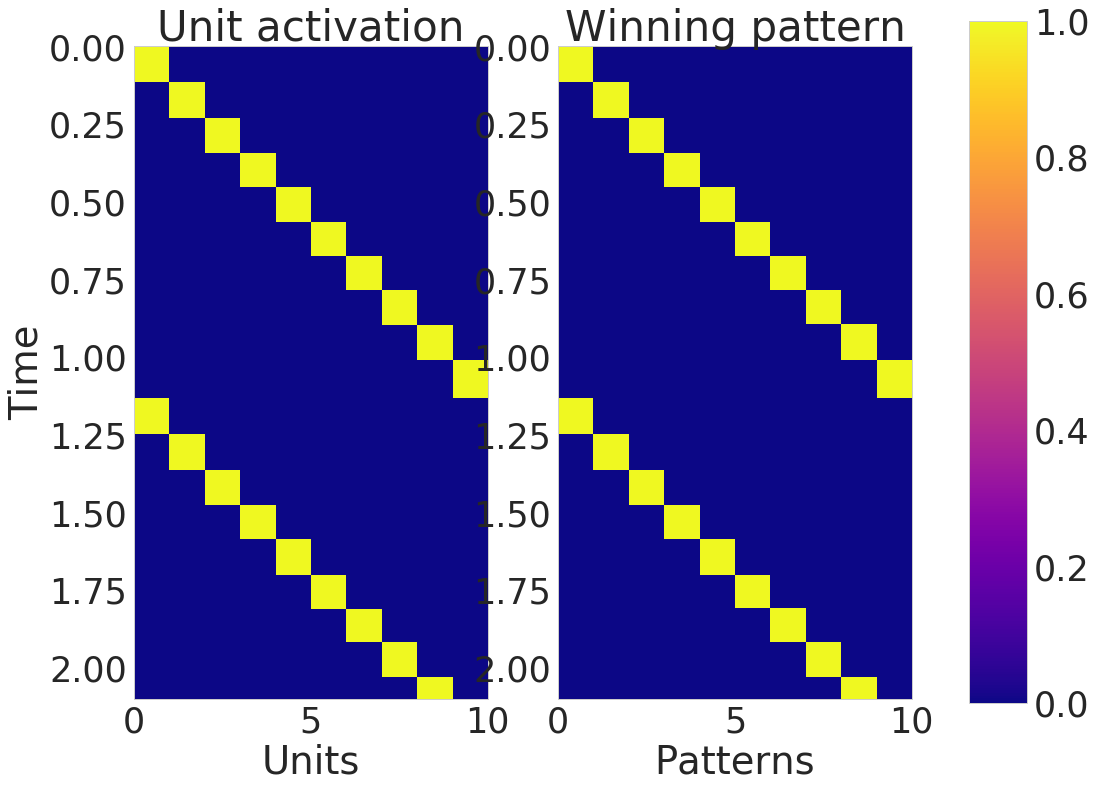

In [6]:
T_recall = 2.0
T_cue = 0.100
sequences = [patterns_indexes]
I_cue = 0.0
n = 1

aux = calculate_recall_time_quantities(manager, T_recall, T_cue, n, sequences)
total_sequence_time, mean, std, success, timings = aux
plot_network_activity_angle(manager)
print('success', success)

## An simple example of the weight evolution

In [27]:
tau_z_pre = 0.050

# Patterns parameters
hypercolumns = 1
minicolumns = 10
n_patterns = 10

# Manager properties
dt = 0.001
values_to_save = ['o', 's', 'z_pre', 'z_post', 'a', 'i_ampa', 'i_nmda']
    
# Protocol
training_time = 0.100
inter_sequence_interval = 0
inter_pulse_interval = 0.0
epochs = 1

# Build the network
nn = BCPNNPerfect(hypercolumns, minicolumns, g_w_ampa=g_w_ampa, g_w=g_w, g_a=g_a, tau_a=tau_a, 
                  sigma=sigma, G=G, tau_z_pre=tau_z_pre,
                z_transfer=False, diagonal_zero=False, strict_maximum=True, perfect=True)



# Build the manager
manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)
nn.z_pre = np.zeros(nn.n_units)
# Build the protocol for training
protocol = Protocol()
patterns_indexes = [i for i in range(n_patterns)]
protocol.simple_protocol(patterns_indexes, training_time=training_time, inter_pulse_interval=inter_pulse_interval,
                         inter_sequence_interval=inter_sequence_interval, epochs=epochs)

# Train
epoch_history = manager.run_network_protocol(protocol=protocol, verbose=True)

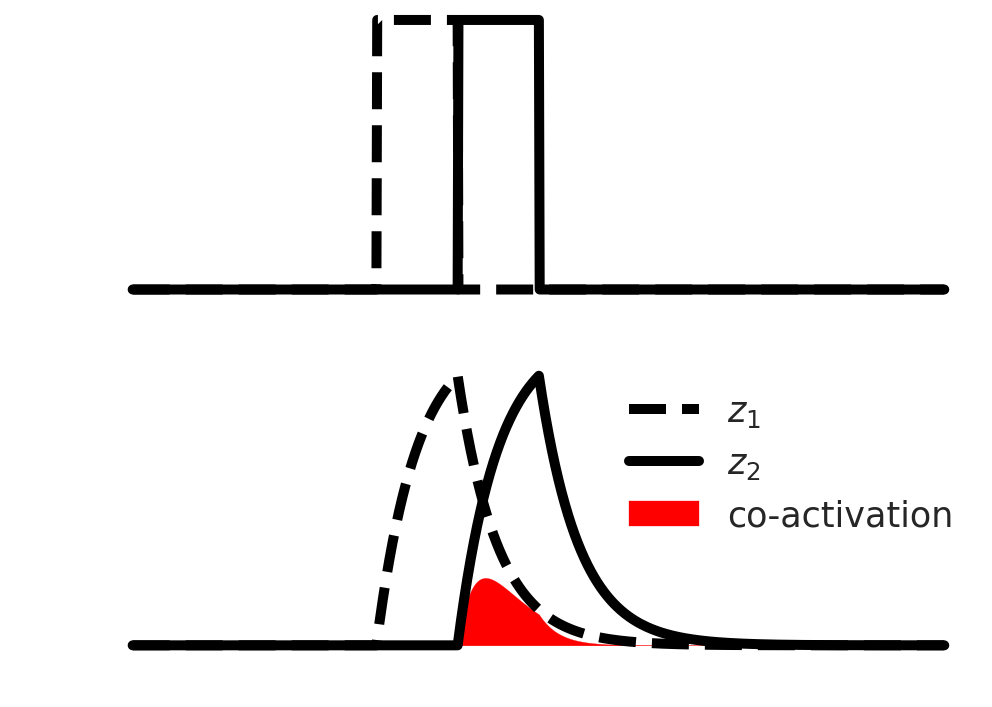

In [40]:
o = manager.history['o']
z = manager.history['z_pre']

patterns = [3, 4]

linewidth = 10
time = np.arange(0, manager.T_total, dt)

fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.plot(time, o[:, 3], linewidth=linewidth, ls='--', color='black', label='o_1') 
ax1.plot(time, o[:, 4], linewidth=linewidth, ls='-', color='black', label='o_2') 

y1 = z[:, 3]
y2 = z[:, 4]

ax2.plot(time, y1, linewidth=linewidth, ls='--', color='black', label=r'$z_{1}$')
ax2.plot(time, y2, linewidth=linewidth, ls='-', color='black', label=r'$z_{2}$')

z  = y1 * y2 
if True:
    ax2.fill_between(time, z, 0, color='red', label='co-activation')
else:
    ax2.fill_between(time, y1, 0, where=y1 <= y2, color='red', label='co-activation')
    ax2.fill_between(time, y2, 0, where=y2 < y1, color='red');

ax2.legend()

if True:
    ax1.axis('off')
    ax2.axis('off');

## Learning 
Here we need to show how the learning looks across time, important parameters are the trainign time and epochs. But first let's etxract the data of the pattern above

* Training time
* Epochs
* Number of patterns
* Number of minicolumns

In [10]:
from_pattern = 2
to_pattern = 3

def get_weights(manager, from_pattern, to_pattern):

    w_self = manager.nn.w_ampa[from_pattern, from_pattern]
    w_next = manager.nn.w_ampa[to_pattern, from_pattern]
    w_rest = np.mean(nn.w_ampa[(to_pattern + 1):, from_pattern])
    
    return w_self, w_next, w_rest

In [11]:
w_self, w_next, w_rest = get_weights(manager, from_pattern, to_pattern)
print('w self', w_self)
print('w_next', w_next)
print('w_rest', w_rest)

w self 0.587890794147
w_next -0.0735762330699
w_rest -0.0989181819004


#### General parameters

In [12]:
g_w_ampa = 2.0
g_w = 0.0 
g_a = 10.0
tau_a = 0.250
G = 1.0
sigma = 0.0

# Patterns parameters
hypercolumns = 1
minicolumns = 10
n_patterns = 10

# Manager properties
dt = 0.001
values_to_save = ['o', 's']
    
# Protocol
training_time = 0.100
inter_sequence_interval = 1.0
inter_pulse_interval = 0.0
epochs = 3

In [13]:
markersize = 32
linewidth = 10

#### Training times

In [14]:
training_times_vector = np.arange(0.050, 2.050, 0.050)
w_self_vector_tt = np.zeros_like(training_times_vector)
w_next_vector_tt = np.zeros_like(training_times_vector)
w_rest_vector_tt = np.zeros_like(training_times_vector)

for index, training_time_ in enumerate(training_times_vector):

    # Build the network
    nn = BCPNNPerfect(hypercolumns, minicolumns, g_w_ampa=g_w_ampa, g_w=g_w, g_a=g_a, tau_a=tau_a, 
                      sigma=sigma, G=G,
                    z_transfer=False, diagonal_zero=False, strict_maximum=True, perfect=True)

    # Build the manager
    manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

    # Build the protocol for training
    protocol = Protocol()
    patterns_indexes = [i for i in range(n_patterns)]
    protocol.simple_protocol(patterns_indexes, training_time=training_time_, inter_pulse_interval=inter_pulse_interval,
                             inter_sequence_interval=inter_sequence_interval, epochs=epochs)

    # Train
    epoch_history = manager.run_network_protocol(protocol=protocol, verbose=False)
    
    w_self, w_next, w_rest = get_weights(manager, from_pattern, to_pattern)

    w_self_vector_tt[index] = w_self
    w_next_vector_tt[index] = w_next
    w_rest_vector_tt[index] = w_rest

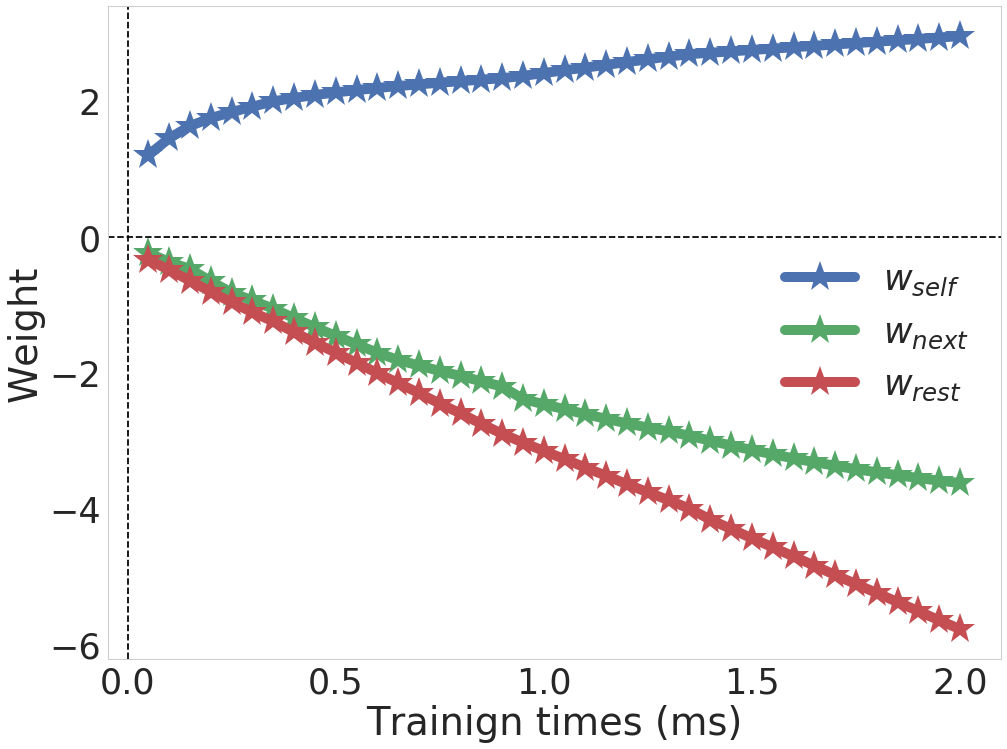

In [15]:
fig1 = plt.figure(figsize=(16, 12))
ax1 = fig1.add_subplot(111)
ax1.plot(training_times_vector, w_self_vector_tt, '*-', lw=linewidth, markersize=markersize, label=r'$w_{self}$')
ax1.plot(training_times_vector, w_next_vector_tt, '*-', lw=linewidth, markersize=markersize, label=r'$w_{next}$')
ax1.plot(training_times_vector, w_rest_vector_tt, '*-', lw=linewidth, markersize=markersize, label=r'$w_{rest}$')


ax1.set_xlabel('Trainign times (ms)')
ax1.set_ylabel('Weight')

ax1.axhline(0, ls='--', color='black')
ax1.axvline(0, ls='--', color='black')


ax1.legend();

#### Epochs

In [16]:
epochs_vector = np.arange(1, 50, 1, dtype='int')
w_self_vector_epochs = np.zeros_like(epochs_vector, dtype='float')
w_next_vector_epochs = np.zeros_like(epochs_vector, dtype='float')
w_rest_vector_epochs = np.zeros_like(epochs_vector, dtype='float')

for index, epochs_ in enumerate(epochs_vector):

    # Build the network
    nn = BCPNNPerfect(hypercolumns, minicolumns, g_w_ampa=g_w_ampa, g_w=g_w, g_a=g_a, tau_a=tau_a, 
                     sigma=sigma, G=G,
                    z_transfer=False, diagonal_zero=False, strict_maximum=True, perfect=True)

    # Build the manager
    manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

    # Build the protocol for training
    protocol = Protocol()
    patterns_indexes = [i for i in range(n_patterns)]
    protocol.simple_protocol(patterns_indexes, training_time=training_time, inter_pulse_interval=inter_pulse_interval,
                             inter_sequence_interval=inter_sequence_interval, epochs=epochs_)

    # Train
    epoch_history = manager.run_network_protocol(protocol=protocol, verbose=False)
    
    w_self, w_next, w_rest = get_weights(manager, from_pattern, to_pattern)
    w_self_vector_epochs[index] = w_self
    w_next_vector_epochs[index] = w_next
    w_rest_vector_epochs[index] = w_rest

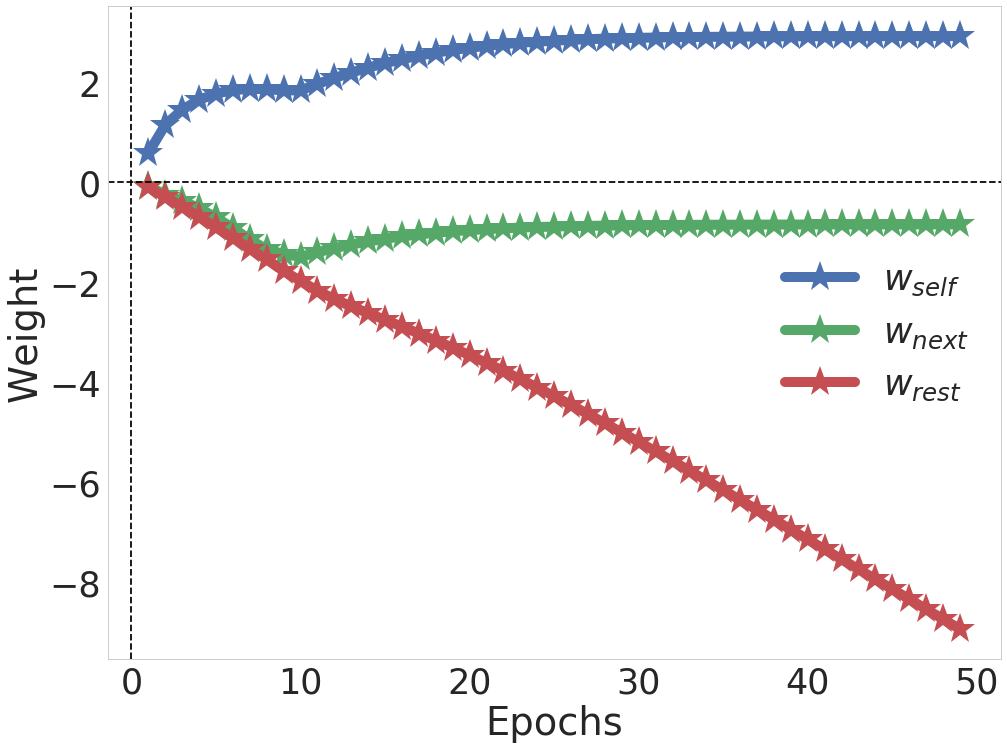

In [17]:
fig2 = plt.figure(figsize=(16, 12))
ax2 = fig2.add_subplot(111)
ax2.plot(epochs_vector, w_self_vector_epochs, '*-', lw=linewidth, markersize=markersize, label=r'$w_{self}$')
ax2.plot(epochs_vector, w_next_vector_epochs, '*-', lw=linewidth, markersize=markersize, label=r'$w_{next}$')
ax2.plot(epochs_vector, w_rest_vector_epochs, '*-', lw=linewidth, markersize=markersize, label=r'$w_{rest}$')


ax2.set_xlabel('Epochs')
ax2.set_ylabel('Weight')

ax2.axhline(0, ls='--', color='black')
ax2.axvline(0, ls='--', color='black')


ax2.legend();

#### Number of minicolumns

In [18]:
minicolumns_vector = np.arange(10, 55, 5, dtype='int')
w_self_vector_minicolumns = np.zeros_like(minicolumns_vector, dtype='float')
w_next_vector_minicolumns = np.zeros_like(minicolumns_vector, dtype='float')
w_rest_vector_minicolumns = np.zeros_like(minicolumns_vector, dtype='float')

for index, minicolumns_ in enumerate(minicolumns_vector):

    # Build the network
    nn = BCPNNPerfect(hypercolumns, minicolumns_, g_w_ampa=g_w_ampa, g_w=g_w, g_a=g_a, tau_a=tau_a, 
                     sigma=sigma, G=G,
                    z_transfer=False, diagonal_zero=False, strict_maximum=True, perfect=True)

    # Build the manager
    manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

    # Build the protocol for training
    protocol = Protocol()
    patterns_indexes = [i for i in range(minicolumns_)]
    protocol.simple_protocol(patterns_indexes, training_time=training_time, inter_pulse_interval=inter_pulse_interval,
                             inter_sequence_interval=inter_sequence_interval, epochs=epochs)

    # Train
    epoch_history = manager.run_network_protocol(protocol=protocol, verbose=False)
    
    w_self, w_next, w_rest = get_weights(manager, from_pattern, to_pattern)
    w_self_vector_minicolumns[index] = w_self
    w_next_vector_minicolumns[index] = w_next
    w_rest_vector_minicolumns[index] = w_rest

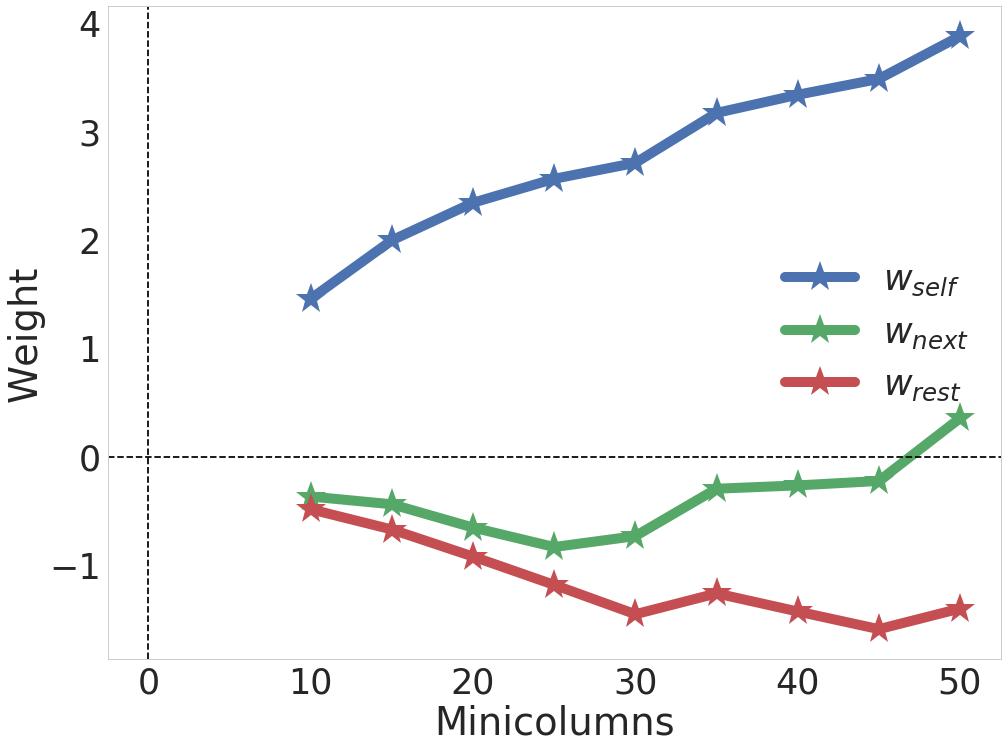

In [19]:
fig3 = plt.figure(figsize=(16, 12))
ax3 = fig3.add_subplot(111)
ax3.plot(minicolumns_vector, w_self_vector_minicolumns, '*-', lw=linewidth, markersize=markersize, label=r'$w_{self}$')
ax3.plot(minicolumns_vector, w_next_vector_minicolumns, '*-', lw=linewidth, markersize=markersize, label=r'$w_{next}$')
ax3.plot(minicolumns_vector, w_rest_vector_minicolumns, '*-', lw=linewidth, markersize=markersize, label=r'$w_{rest}$')


ax3.set_xlabel('Minicolumns')
ax3.set_ylabel('Weight')

ax3.axhline(0, ls='--', color='black')
ax3.axvline(0, ls='--', color='black')


ax3.legend();

#### Number of patterns

In [20]:
n_patterns_vector = np.arange(10, 55, 5, dtype='int')
w_self_vector_patterns = np.zeros_like(n_patterns_vector, dtype='float')
w_next_vector_patterns = np.zeros_like(n_patterns_vector, dtype='float')
w_rest_vector_patterns = np.zeros_like(n_patterns_vector, dtype='float')

for index, n_patterns_ in enumerate(n_patterns_vector):

    # Build the network
    nn = BCPNNPerfect(hypercolumns, n_patterns_vector[-1], g_w_ampa=g_w_ampa, g_w=g_w, g_a=g_a, tau_a=tau_a, 
                     sigma=sigma, G=G,
                    z_transfer=False, diagonal_zero=False, strict_maximum=True, perfect=True)

    # Build the manager
    manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

    # Build the protocol for training
    protocol = Protocol()
    patterns_indexes = [i for i in range(n_patterns_)]
    protocol.simple_protocol(patterns_indexes, training_time=training_time, inter_pulse_interval=inter_pulse_interval,
                             inter_sequence_interval=inter_sequence_interval, epochs=epochs)

    # Train
    epoch_history = manager.run_network_protocol(protocol=protocol, verbose=False)
    
    w_self, w_next, w_rest = get_weights(manager, from_pattern, to_pattern)
    w_self_vector_patterns[index] = w_self
    w_next_vector_patterns[index] = w_next
    w_rest_vector_patterns[index] = w_rest

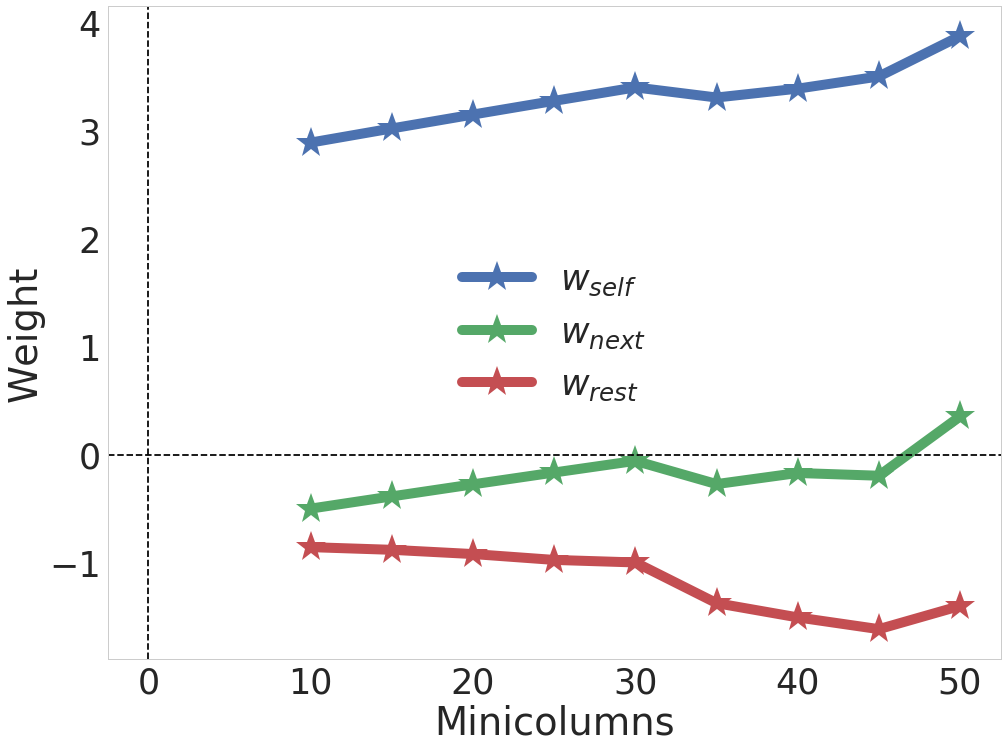

In [21]:
fig4 = plt.figure(figsize=(16, 12))
ax4 = fig4.add_subplot(111)
ax4.plot(n_patterns_vector, w_self_vector_patterns, '*-', lw=linewidth, markersize=markersize, label=r'$w_{self}$')
ax4.plot(n_patterns_vector, w_next_vector_patterns, '*-', lw=linewidth, markersize=markersize, label=r'$w_{next}$')
ax4.plot(n_patterns_vector, w_rest_vector_patterns, '*-', lw=linewidth, markersize=markersize, label=r'$w_{rest}$')


ax4.set_xlabel('Minicolumns')
ax4.set_ylabel('Weight')

ax4.axhline(0, ls='--', color='black')
ax4.axvline(0, ls='--', color='black')


ax4.legend();